In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from imblearn.ensemble import BalancedBaggingClassifier

# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    LabelEncoder,
    MinMaxScaler,
)

In [2]:
df1 = pd.read_csv("heart3.csv")
df1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [18]:
df1.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [19]:
df1.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<Figure size 1800x1152 with 0 Axes>

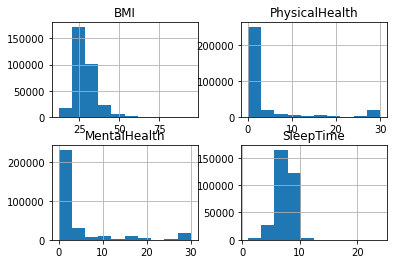

In [20]:
plt.figure(figsize=(25, 16))
df1.hist()
plt.show()

<AxesSubplot:>

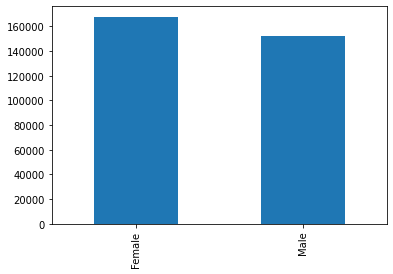

In [21]:
df1["Sex"].value_counts().plot(kind="bar")

In [17]:
encode = LabelEncoder()

df1["HeartDisease"] = encode.fit_transform(df1["HeartDisease"])

In [23]:
oh_encode = OneHotEncoder()

x = pd.DataFrame(oh_encode.fit_transform(df1[["AgeCategory"]]).toarray())  # type: ignore

In [3]:
y = df1["HeartDisease"]
df1 = df1.drop("HeartDisease", axis=1)

In [4]:
cat_clmns = df1.select_dtypes(include="object").columns.tolist()
num_clmns = df1.select_dtypes(include=["int", "float"]).columns.tolist()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df1, y, test_size=0.2, random_state=42
)

In [7]:
scale = StandardScaler()
X_train[num_clmns] = scale.fit_transform(X_train[num_clmns])
X_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
95877,-0.785981,Yes,No,No,-0.423515,-0.489919,No,Male,75-79,White,No,Yes,Very good,-0.065988,No,No,No
228939,-0.136950,Yes,No,Yes,3.354799,-0.489919,No,Male,55-59,White,No,Yes,Good,-0.763366,No,No,No
260256,0.684947,No,No,No,-0.171627,-0.238557,No,Male,50-54,Hispanic,No,No,Very good,0.631390,No,No,No
84785,0.469651,No,No,No,-0.423515,-0.489919,No,Female,25-29,White,No,Yes,Excellent,0.631390,No,No,No
83845,-0.581686,Yes,No,No,-0.171627,0.766890,No,Male,80 or older,White,Yes,Yes,Good,-0.065988,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.207210,No,No,No,-0.423515,-0.489919,No,Male,60-64,White,No,No,Good,0.631390,No,No,No
259178,2.242308,Yes,No,No,-0.423515,0.138486,No,Male,35-39,White,No,Yes,Good,-0.763366,No,No,No
131932,0.449222,Yes,No,No,1.087811,0.264167,No,Male,65-69,White,"No, borderline diabetes",No,Very good,0.631390,No,No,No
146867,-0.957275,No,No,No,0.458092,0.138486,No,Female,18-24,White,No,Yes,Excellent,0.631390,No,No,No


In [8]:
df2 = pd.get_dummies(X_train[cat_clmns])
X_train.drop(cat_clmns, axis=1, inplace=True)
X_train = X_train.join(df2)
X_train

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
95877,-0.785981,-0.423515,-0.489919,-0.065988,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
228939,-0.136950,3.354799,-0.489919,-0.763366,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
260256,0.684947,-0.171627,-0.238557,0.631390,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
84785,0.469651,-0.423515,-0.489919,0.631390,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
83845,-0.581686,-0.171627,0.766890,-0.065988,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.207210,-0.423515,-0.489919,0.631390,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
259178,2.242308,-0.423515,0.138486,-0.763366,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
131932,0.449222,1.087811,0.264167,0.631390,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
146867,-0.957275,0.458092,0.138486,0.631390,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0


In [9]:
smot = SMOTE()
x_sm, ys_m = smot.fit_resample(X_train, y_train)  # type: ignore

In [26]:
numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])

categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_clmns),
        ("cat", categorical_transformer, cat_clmns),
    ],
)

In [28]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(k_neighbors=60)),
        ("classifier", LogisticRegression()),
    ]
)

In [29]:
s = clf.fit(X_train, y_train)

c:\Users\satya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [11]:
df3 = pd.get_dummies(X_test[cat_clmns])
X_test.drop(cat_clmns, axis=1, inplace=True)
X_test = X_test.join(df3)
X_test

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
271884,27.63,0.0,25.0,7.0,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
270361,21.95,0.0,20.0,6.0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
219060,31.32,0.0,0.0,6.0,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
24010,40.35,30.0,0.0,8.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
181930,35.61,30.0,30.0,4.0,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181387,28.06,0.0,15.0,7.0,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1
13791,29.68,7.0,25.0,3.0,0,1,1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
180164,21.11,4.0,0.0,7.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
94526,23.99,0.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0


In [12]:
X_test[num_clmns] = scale.transform(X_test[num_clmns])
X_test

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
271884,-0.110234,-0.423515,2.652105,-0.065988,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
270361,-1.002849,-0.423515,2.023700,-0.763366,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
219060,0.469651,-0.423515,-0.489919,-0.763366,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
24010,1.888720,3.354799,-0.489919,0.631390,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
181930,1.143827,3.354799,3.280510,-2.158123,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181387,-0.042659,-0.423515,1.395295,-0.065988,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,0,1
13791,0.211924,0.458092,2.652105,-2.855501,0,1,1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
180164,-1.134855,0.080260,-0.489919,-0.065988,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
94526,-0.682262,-0.423515,-0.489919,0.631390,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0


In [13]:
smot2 = SMOTE()
x_sm2, y_sm2 = smot2.fit_resample(X_test, y_test) # type: ignore

In [14]:
y_pred = lg.predict(x_sm2)

In [15]:
cm = confusion_matrix(y_sm2, y_pred)
cr = classification_report(y_sm2, y_pred)

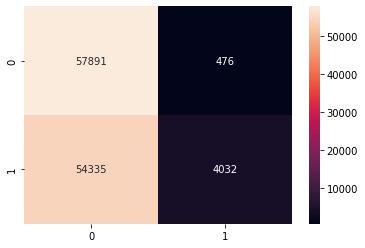

In [16]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xticks()
plt.show()

In [17]:
print(cr)

              precision    recall  f1-score   support

          No       0.52      0.99      0.68     58367
         Yes       0.89      0.07      0.13     58367

    accuracy                           0.53    116734
   macro avg       0.71      0.53      0.40    116734
weighted avg       0.71      0.53      0.40    116734

